# Sequence comparison

In [1]:
import csv
from Bio import pairwise2
import pandas as pd

In [2]:
df_fegenie = pd.read_csv('FeGenie_output/FeGenie-geneSummary.csv')
df_ref = pd.read_csv('combined_output.csv')

In [3]:
df_fegenie

,category,genome/assembly,orf,HMM,bitscore,bitscore_cutoff,clusterID,heme_c_binding_motifs,heme_b_binding_motifs,hematite_binding_motifs,protein_sequence
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,CP000538.1_110,ExbB-family,94.2,22.3,1,0,0,0,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,CP000538.1_111,ExbD-family,97.2,32.7,1,0,0,0,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,CP000538.1_112,TonB-family,47.6,21.8,1,0,0,0,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,81-176_sequence.fasta,CP000538.1_143,FpvE-family-permease,39.0,25.8,2,0,0,0,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,81-176_sequence.fasta,CP000538.1_145,FpvC-family-siderophore-transport,48.1,18.5,2,0,0,0,MKKILLFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...,...,...,...,...,...,...
139,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,NC_009839.1_1505,PvuD-family-ATP-binding-protein,188.6,172.0,79,0,0,0,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
140,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,NC_009839.1_1506,HatD-family-substrate-binding-protein,113.0,27.5,79,0,0,0,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
141,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,NC_009839.1_1517,ExbB-family,120.9,22.3,80,0,0,0,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
142,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,NC_009839.1_1518,ExbD-family,74.1,32.7,80,0,0,0,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [4]:
selection = ['category','genome/assembly','HMM','orf','protein_sequence']
df1 = df_fegenie[selection]
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,TonB-family,CP000538.1_112,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_143,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvC-family-siderophore-transport,CP000538.1_145,MKKILLFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...
139,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
140,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
141,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,ExbB-family,NC_009839.1_1517,MEFLKDYIDLIIFLILGIMAFIAFWCVVERMLFFRKINFKNYENQE...
142,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,ExbD-family,NC_009839.1_1518,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...


In [5]:
df1.protein_sequence.describe()

count                                                   144
unique                                                  116
top       MLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDTHYTP...
freq                                                      4
Name: protein_sequence, dtype: object

In [6]:
df1 = df1.drop_duplicates(['protein_sequence'])
df1

,category,genome/assembly,HMM,orf,protein_sequence
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,TonB-family,CP000538.1_112,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_143,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvC-family-siderophore-transport,CP000538.1_145,MKKILLFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
...,...,...,...,...,...
136,iron_storage,NCTC11828_81116_sequence.fasta,PF00210-Ferritin_like_domain,NC_009839.1_1423,MSVTKQLLQMQADAHHLWVKFHNYHWNVKGLQFFSIHEYTEKAYEE...
137,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...
139,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...
140,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...


In [7]:
df_ref

,family name,gene sequence,sequence
0,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...
1,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...
2,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...
3,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...
4,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...
5,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...
6,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...
7,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...
8,tonB3,48,MKTFISNHKNQSSFITLFVFTPLFFVFLYSKDFLHIQPNETIKENK...
9,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...


In [8]:
def calculate_similarity(seq1, seq2):
    # Calculate the similarity of two sequences as a percentage
    alignments = pairwise2.align.globalxx(seq1, seq2)
    max_score = max(alignments, key=lambda x: x.score)[2]
    return max_score / max(len(seq1), len(seq2)) * 100


In [9]:
# Initialize an empty list to store the result rows
result_rows = []

In [10]:
# Iterate over each combination of rows from df1 and df_ref
for index1, row1 in df1.iterrows():
    for index2, row2 in df_ref.iterrows():
        # Calculate similarity score
        similarity = calculate_similarity(row1['protein_sequence'], row2['sequence'])
        
        # Combine all columns from both rows and add the similarity score
        combined_row = {**row1.to_dict(), **row2.to_dict(), 'similarity_score': similarity}
        
        # Append the combined row to the list
        result_rows.append(combined_row)


In [11]:
# Create a dataframe from the result rows
combined_df = pd.DataFrame(result_rows)

In [12]:
combined_df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
3591,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3592,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,21.335505
3593,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3594,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,19.436620


In [13]:
# Save the combined DataFrame to a CSV file
combined_df.to_csv('combined_similarity_results.csv', index=False)


# Preprocessing for BLAST analysis

In [14]:
df = pd.read_csv('combined_similarity_results.csv')
df

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
3591,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3592,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,21.335505
3593,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3594,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,19.436620


In [15]:
df.similarity_score.describe()

count    3596.000000
mean       29.702661
std        11.826568
min         5.721003
25%        23.443709
50%        28.508772
75%        34.796003
max       100.000000
Name: similarity_score, dtype: float64

In [16]:
df.protein_sequence.describe()

count                                                  3596
unique                                                  116
top       MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...
freq                                                     31
Name: protein_sequence, dtype: object

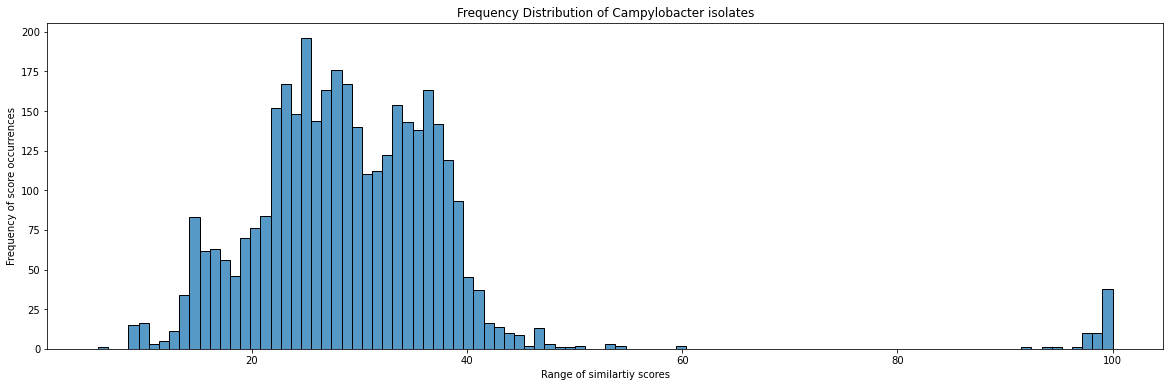

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,6))
sns.histplot(data=df, x='similarity_score', kde=False, bins = 100)


# Set the title and labels for the plot
plt.title('Frequency Distribution of Campylobacter isolates')
plt.xlabel('Range of similartiy scores')
plt.ylabel('Frequency of score occurrences')

plt.savefig('Frequency Distribution of campylobacter isolates.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

In [21]:
# Create a new DataFrame with only 100% similarity
df_100_similarity = df[df['similarity_score'] == 100.0]

In [22]:
df_100_similarity

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
1550,iron_aquisition-iron_transport,RM1221_sequence.fasta,FbpB-FutB-family-iron-permease,CP010072.1_171,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,100.0
1584,iron_aquisition-iron_transport,RM1221_sequence.fasta,FutA1-family-iron-binding-proteins,CP010072.1_172,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,100.0
1691,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbB-family,CP010072.1_176,MLKKCFYFVFLLLNLNAEANATDTNLSFDSSKIETEAPKIELSLSS...,exbB1,48,MLKKCFYFVFLLLNLNAEANATDTNLSFDSSKIETEAPKIELSLSS...,100.0
1728,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbD-family,CP010072.1_177,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,exbD1,48,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,100.0
1747,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,TonB-family,CP010072.1_178,MKSSVIFGFVLSLILHTLVLMFFLFSFYTQEKSSGVDFKQGAEFTS...,tonB1,48,MKSSVIFGFVLSLILHTLVLMFFLFSFYTQEKSSGVDFKQGAEFTS...,100.0
2036,iron_aquisition-siderophore_transport,RM1221_sequence.fasta,FpvE-family-permease,CP010072.1_1460,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,100.0
2051,iron_aquisition-siderophore_transport,RM1221_sequence.fasta,PvuD-family-ATP-binding-protein,CP010072.1_1461,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,100.0
2381,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbD-family,CP010072.1_1723,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,exbD2,48,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,100.0
2430,iron_aquisition-siderophore_transport_potential,NCTC11168_sequence.fasta,ExbB-family,NZ_LS483362.1_103,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.0
2450,iron_aquisition-siderophore_transport_potential,NCTC11168_sequence.fasta,ExbD-family,NZ_LS483362.1_104,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,100.0


In [23]:
df_100_similarity = df_100_similarity.drop_duplicates(['protein_sequence'])
df_100_similarity

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
1550,iron_aquisition-iron_transport,RM1221_sequence.fasta,FbpB-FutB-family-iron-permease,CP010072.1_171,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,100.0
1584,iron_aquisition-iron_transport,RM1221_sequence.fasta,FutA1-family-iron-binding-proteins,CP010072.1_172,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,100.0
1691,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbB-family,CP010072.1_176,MLKKCFYFVFLLLNLNAEANATDTNLSFDSSKIETEAPKIELSLSS...,exbB1,48,MLKKCFYFVFLLLNLNAEANATDTNLSFDSSKIETEAPKIELSLSS...,100.0
1728,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbD-family,CP010072.1_177,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,exbD1,48,MIKTEMAHKEEELSEINITPFIDIMLVLLIVFMAVTPLITSSIKIE...,100.0
1747,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,TonB-family,CP010072.1_178,MKSSVIFGFVLSLILHTLVLMFFLFSFYTQEKSSGVDFKQGAEFTS...,tonB1,48,MKSSVIFGFVLSLILHTLVLMFFLFSFYTQEKSSGVDFKQGAEFTS...,100.0
2036,iron_aquisition-siderophore_transport,RM1221_sequence.fasta,FpvE-family-permease,CP010072.1_1460,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,100.0
2051,iron_aquisition-siderophore_transport,RM1221_sequence.fasta,PvuD-family-ATP-binding-protein,CP010072.1_1461,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,100.0
2381,iron_aquisition-siderophore_transport_potential,RM1221_sequence.fasta,ExbD-family,CP010072.1_1723,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,exbD2,48,MLKLPKNEGLNIVPFIDIMLVLLAIVLSISTFIAHGKIQISLPSSE...,100.0
2430,iron_aquisition-siderophore_transport_potential,NCTC11168_sequence.fasta,ExbB-family,NZ_LS483362.1_103,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,100.0
2450,iron_aquisition-siderophore_transport_potential,NCTC11168_sequence.fasta,ExbD-family,NZ_LS483362.1_104,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,100.0


In [24]:
df_100_similarity.protein_sequence.describe()

count                                                    18
unique                                                   18
top       MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...
freq                                                      1
Name: protein_sequence, dtype: object

In [25]:
df_above95 = df[df['similarity_score'] >= 95.0]
df_above95 = df_above95.drop_duplicates('protein_sequence')
df_above95

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
416,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_1267,MFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,CeuB,48,LFFKHILSLKVLIALLLFFGMISLFIGVISINVKDILNLNSTQLEI...,98.761610
455,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_1268,MRKKMLILSFLTLGMIGIFILAGLNGFDEYALKSRFLQIAAIIIVA...,CeuC,48,MRKKMLILSFLTLNMIGIFIFVGLNGFDEYALKSRFLQIAAIIIVA...,99.041534
470,iron_aquisition-siderophore_transport,81-176_sequence.fasta,PvuD-family-ATP-binding-protein,CP000538.1_1269,MIKLKNITKFYDNKAIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,CeuD,48,MIKLKNITKFYDNKVIISDLSLDFHKGKITSIIGANGAGKSTLLAL...,97.619048
526,iron_aquisition-siderophore_transport,81-176_sequence.fasta,HatD-family-substrate-binding-protein,CP000538.1_1270,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,CeuE,48,MKKSLVFAFFAFFLSLILTACNSNSNENNASSTTKTNTATVKVLPI...,98.187311
660,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_1512,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,chuB,48,MLNLNTHSKILVIIGLLVAYIIASFTALCLGDENLNPKELFSYIFS...,99.696049


In [26]:
df_above90 = df[df['similarity_score'] >= 90.0]
df_above90 = df_above90.drop_duplicates('protein_sequence')
df_above90

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
...,...,...,...,...,...,...,...,...,...
3437,iron_aquisition-iron_transport,NCTC11828_81116_sequence.fasta,FeoB-family-iron-transporter,NC_009839.1_1302,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
3501,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,94.084507
3518,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,97.683398
3541,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,97.769517


In [27]:
df_above85 = df[df['similarity_score'] >= 85.0]
df_above85 = df_above85.drop_duplicates('protein_sequence')
df_above85

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
...,...,...,...,...,...,...,...,...,...
3437,iron_aquisition-iron_transport,NCTC11828_81116_sequence.fasta,FeoB-family-iron-transporter,NC_009839.1_1302,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
3501,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,94.084507
3518,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,97.683398
3541,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,97.769517


In [28]:
df_above80 = df[df['similarity_score'] >= 80.0]
df_above80 = df_above80.drop_duplicates('protein_sequence')
df_above80

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
...,...,...,...,...,...,...,...,...,...
3437,iron_aquisition-iron_transport,NCTC11828_81116_sequence.fasta,FeoB-family-iron-transporter,NC_009839.1_1302,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
3501,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,94.084507
3518,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,97.683398
3541,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,97.769517


In [29]:
df_above75 = df[df['similarity_score'] >= 75.0]
df_above75 = df_above75.drop_duplicates('protein_sequence')
df_above75

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
...,...,...,...,...,...,...,...,...,...
3437,iron_aquisition-iron_transport,NCTC11828_81116_sequence.fasta,FeoB-family-iron-transporter,NC_009839.1_1302,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
3501,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,94.084507
3518,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,97.683398
3541,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,97.769517


In [30]:
df_above70 = df[df['similarity_score'] >= 70.0]
df_above70 = df_above70.drop_duplicates('protein_sequence')
df_above70

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
12,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbB3,48,MNFEAIFHFFNSSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,99.459459
32,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbD-family,CP000538.1_111,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,99.230769
161,iron_aquisition-iron_transport,81-176_sequence.fasta,YfeB-family-membrane-proteins,CP000538.1_174,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,cfbpC,48,MLEIKNLSKNFGKIQALENINLHVKEGEFLSILGGSGSGKSTLLRI...,99.337748
186,iron_aquisition-iron_transport,81-176_sequence.fasta,FbpB-FutB-family-iron-permease,CP000538.1_175,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSNLTQF...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,99.257885
220,iron_aquisition-iron_transport,81-176_sequence.fasta,FutA1-family-iron-binding-proteins,CP000538.1_176,MKKIFLMFLTAFSFLGASELNIYSARHYDADFEIIKKFEEKTGIKV...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,97.910448
...,...,...,...,...,...,...,...,...,...
3437,iron_aquisition-iron_transport,NCTC11828_81116_sequence.fasta,FeoB-family-iron-transporter,NC_009839.1_1302,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,99.511401
3501,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PirA-family-siderophore-receptor,NC_009839.1_1503,MHPNKKAFKLSLFALLLITNLNAQESNEAINLQKVVVSATGFEQDA...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,94.084507
3518,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,PvuD-family-ATP-binding-protein,NC_009839.1_1505,MLKIQDLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,chuC,48,MLKIHNLSFAYHQKDLLKNIHLELKNQAFIGILGPNGSGKSTLLKL...,97.683398
3541,iron_aquisition-siderophore_transport,NCTC11828_81116_sequence.fasta,HatD-family-substrate-binding-protein,NC_009839.1_1506,MKKILIIMSLFLITLNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,chuD,48,MKKILIIMSLFLIALNAKERLVVLDPASIETLFMLKAEDQIVGIAT...,97.769517


In [31]:
# Get the protein sequences from df_above80
sequences_to_remove = df_above80['protein_sequence'].unique()

# Filter out the rows in df1 that have protein sequences with 80% similarity
df1_filtered = df1[~df1['protein_sequence'].isin(sequences_to_remove)]


In [32]:
df1_filtered

,category,genome/assembly,HMM,orf,protein_sequence
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,TonB-family,CP000538.1_112,MKNYGLSNLNSFLLALAIYISIVILVFFRLVSEVEPAIQYTDIKDS...
3,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvE-family-permease,CP000538.1_143,MLEILNFTFFQNALLGAILVSIACGIIGTLVMINRLFSMAGGITHG...
4,iron_aquisition-siderophore_transport,81-176_sequence.fasta,FpvC-family-siderophore-transport,CP000538.1_145,MKKILLFILSLGIFYTFTQAKNLEQEQNTSSNLVSVSIAPQAFFVK...
8,iron_gene_regulation,81-176_sequence.fasta,PF01475-Iron_dependent_repressor-fur_family,CP000538.1_304,MELLQMLKKHELKATPQRLCVLKILKRHEHPNIDELYTEIKKEYPS...
9,iron_gene_regulation,81-176_sequence.fasta,PF01475-Iron_dependent_repressor-fur_family,CP000538.1_380,MLIENVEYDVLLERFKKILRQGGLKYTKQREVLLKTLYHSDTHYTP...
10,iron_aquisition-siderophore_transport,81-176_sequence.fasta,PvdR-family-sideropore-export,CP000538.1_571,MKKKVILIVLIAILGSVGAYFIFFNNDEKISYLTQKIQKKDISQTI...
11,iron_aquisition-siderophore_transport,81-176_sequence.fasta,PvdT-family-siderophore-export,CP000538.1_572,MIFLKNICKNIGENAILKNVSLSIEKGEFVAIIGQSGSGKTSLLNI...
12,iron_storage,81-176_sequence.fasta,PF00210-Ferritin_like_domain,CP000538.1_577,MLSKEVVKLLNEQINKEMYAANLYLSMSSWCYENSLDGAGAFLFAH...
17,iron_aquisition-iron_transport,81-176_sequence.fasta,FeoB-family-iron-transporter,CP000538.1_1309,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...
18,iron_aquisition-iron_transport,81-176_sequence.fasta,FeoB-family-iron-transporter,CP000538.1_1310,MDYIESGFNALGEFVKNNISNTFIASALADGIIAGVGAVILFLPNI...


In [33]:
#Save the filtered DataFrame to a new CSV file

df1_filtered.to_csv('below80.csv', index=False)

In [34]:
# Filter the combined_df to include only those rows where the similarity_score is below 80%
df_below80 = df[df['similarity_score'] < 80.0]
df_belwo80 = df_below80.drop_duplicates('protein_sequence')
df_below80

# Save the new DataFrame to a CSV file
#df_below80.to_csv('below_80.csv', index=False)

,category,genome/assembly,HMM,orf,protein_sequence,family name,gene sequence,sequence,similarity_score
0,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpB,48,MYKTLKYYKLGAILLALFLALPIFGIFAELFYILFQNFNTSDLTQF...,22.820037
1,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,exbD3,48,MPFDDEKPELNITPLVDIMLVLLAILMVTAPSITYEEKINLPQGSQ...,31.891892
2,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,Cj1397_sequence,YP_002344780.1 ferrous iron transport protein ...,MTLNELKDGQKAIIVNLNAHKELKNRLLSFGFIKNKNLKKIHSSLK...,23.243243
3,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,cfbpA,48,MKKIFFMFLTAVSFLGASELNIYSARHYNADFEIIKKFEEKTGIKV...,28.955224
4,iron_aquisition-siderophore_transport_potential,81-176_sequence.fasta,ExbB-family,CP000538.1_110,MNFEAIFHFFNNSSIITYIVLLWLSLYFILAFSILFARLTYLATWR...,P19,48,MIKKVLSVVAAAAVISTNLFAGEVPIGDPKELNGMEIAAVYLQPIE...,32.972973
...,...,...,...,...,...,...,...,...,...
3591,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_11168_sequence,ADF43014.1 ferric enterobactin receptor [Campy...,MILNIKIIIFKGINLTQIKNIKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3592,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,FeoB,48,MKKIKIALVGQPNVGKSLLINALCKANMKVGNFSGVTIEKASAKTF...,21.335505
3593,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,cfrB_81-176,EAQ73281.2 TonB-dependent receptor putative ...,MILNIKIIIFKGINLTQIKNMKFKKSLLCFLILSGALLKAEEKYQL...,19.176136
3594,iron_aquisition-siderophore_transport_potential,NCTC11828_81116_sequence.fasta,TonB-family,NC_009839.1_1519,MKTLFLNHKYQASYITFIVFIPLLFVIFHSNDFFKMEIKNEDSFSL...,chuA,48,LHPNKKAFKLSLFALLLITNLNAQESNKAINLQKVVVSTTGFEQDA...,19.436620


# BLAST

In [35]:
import pandas as pd
from Bio.Blast import NCBIWWW, NCBIXML
import time

In [36]:
def blast_search(sequence, program='blastp', database='nr', output_format='XML', taxid='192222'):
    result_handle = NCBIWWW.qblast(program, database, sequence, entrez_query=f"txid{taxid}[Organism]", format_type=output_format)
    return result_handle

def parse_blast_xml_to_csv(xml_handle, csv_file_path):
    blast_records = NCBIXML.parse(xml_handle)
    rows = []
    for record in blast_records:
        for alignment in record.alignments:
            for hsp in alignment.hsps:
                rows.append([
                    record.query, alignment.title, alignment.length,
                    hsp.score, hsp.bits, hsp.expect, hsp.query_start, 
                    hsp.query_end, hsp.sbjct_start, hsp.sbjct_end
                ])
                
    df = pd.DataFrame(rows, columns=["Query", "Subject", "Alignment Length", "Score", "Bits", "E-value", "Query Start", "Query End", "Subject Start", "Subject End"])
    df.to_csv(csv_file_path, index=False)

def main(file_path, output_dir):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Iterate through each protein sequence
    for index, row in df.iterrows():
        sequence = row['protein_sequence']
        print(f"Performing BLAST search for sequence {index + 1}/{len(df)}")
        
        # Perform BLAST search
        result_handle = blast_search(sequence)
        
        # Parse XML and save to CSV
        csv_file_path = f"{output_dir}/blast_result_{index + 1}.csv"
        parse_blast_xml_to_csv(result_handle, csv_file_path)
        
        # Close the BLAST result handle
        result_handle.close()

        # To avoid overloading the server, add a delay between requests
        time.sleep(2) 


In [37]:
file_path = 'below80.csv'
output_dir = 'blast/'
main(file_path, output_dir)

Performing BLAST search for sequence 1/54


OSError: Cannot save file into a non-existent directory: 'blast'